In [422]:
import pandas as pd
import numpy as np

import numpy as np
import os
import tarfile
import urllib
import pandas as pd
import urllib.request

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

import sklearn
assert sklearn.__version__ >= "0.20"

data=pd.read_csv('https://raw.githubusercontent.com/HWhr3000/F21DL_Coursework_grp2/main/data/airline_passenger_satisfaction.csv')
data.head()

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction,Loyalty
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,5,2,5,5,5,3,5,5,Neutral or Dissatisfied,1
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,4,5,5,3,5,2,5,5,Satisfied,4
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,5,3,5,5,3,4,3,3,Satisfied,4
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,4,4,5,2,5,5,Satisfied,4
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,4,4,5,4,3,3,3,3,Satisfied,4


In [423]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 25 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ID                                      129880 non-null  int64  
 1   Gender                                  129880 non-null  object 
 2   Age                                     129880 non-null  int64  
 3   Customer Type                           129880 non-null  object 
 4   Type of Travel                          129880 non-null  object 
 5   Class                                   129880 non-null  object 
 6   Flight Distance                         129880 non-null  int64  
 7   Departure Delay                         129880 non-null  int64  
 8   Arrival Delay                           129487 non-null  float64
 9   Departure and Arrival Time Convenience  129880 non-null  int64  
 10  Ease of Online Booking                  1298

In [424]:
data.describe()

,ID,Age,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Loyalty
count,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000
mean,64940.500000,39.427957,1190.316392,14.713713,15.091129,3.057599,2.756876,3.306267,3.252633,2.976925,3.383023,3.441361,3.350878,3.286326,3.204774,3.642193,2.728696,3.358077,3.632114,3.068278
std,37493.270818,15.119360,997.452477,38.071126,38.465650,1.526741,1.401740,1.266185,1.350719,1.278520,1.287099,1.319289,1.316252,1.313682,1.329933,1.176669,1.329340,1.334049,1.180025,0.993292
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,32470.750000,27.000000,414.000000,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000,3.000000
50%,64940.500000,40.000000,844.000000,0.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,3.000000,4.000000,4.000000,3.000000
75%,97410.250000,51.000000,1744.000000,12.000000,13.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,5.000000,4.000000
max,129880.000000,85.000000,4983.000000,1592.000000,1584.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000


In [428]:
data['Class'].value_counts()

Class
Business        62160
Economy         58309
Economy Plus     9411
Name: count, dtype: int64

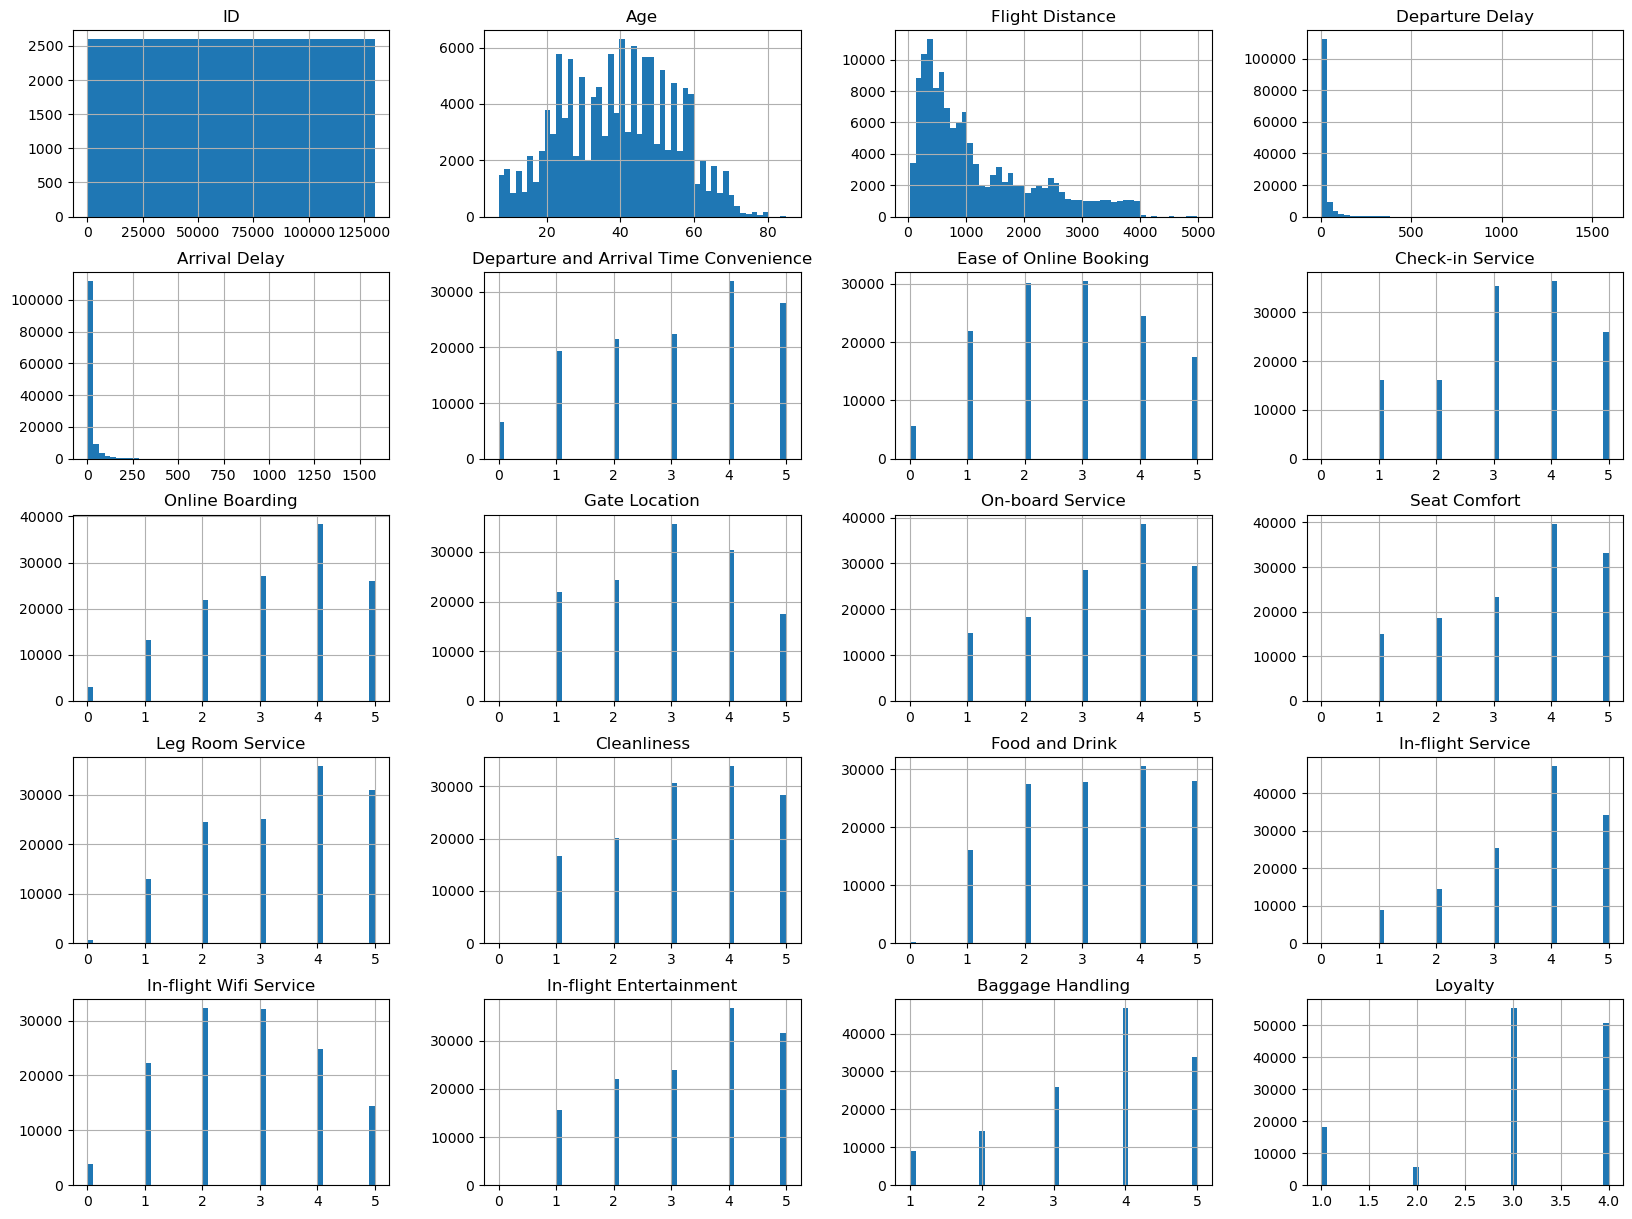

In [430]:
data.hist(bins=50, figsize=(20,15))
plt.show()

In [432]:
# Drop the ID column
data = data.drop('ID', axis=1)
data['Loyalty'].value_counts()

Loyalty
3    55372
4    50728
1    18080
2     5700
Name: count, dtype: int64

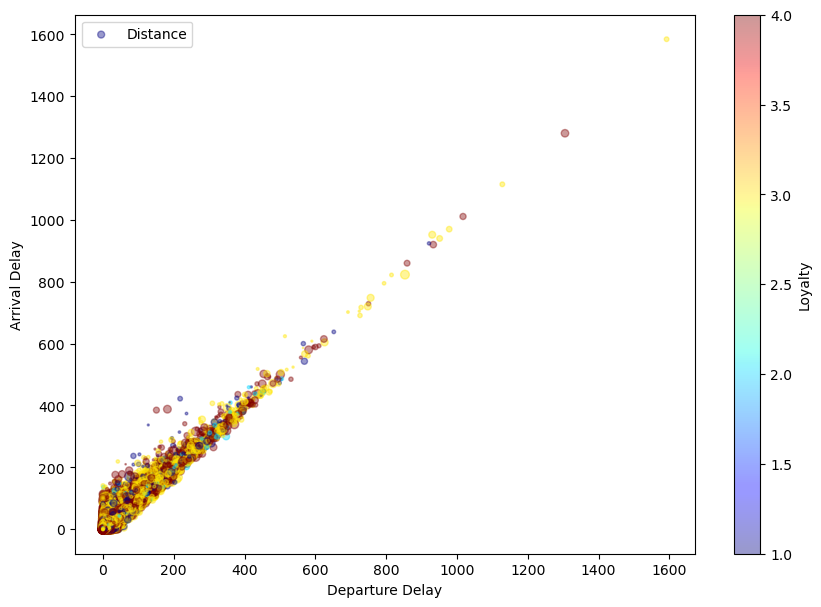

In [434]:
data.plot(kind="scatter", x="Departure Delay", y="Arrival Delay", alpha=0.4,
    s=data["Flight Distance"]/100, label="Distance", figsize=(10,7),
    c="Loyalty", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()

In [436]:
import seaborn as sns

# Check for unique values in categorical columns to understand distributions
categorical_columns = ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'Satisfaction']
for col in categorical_columns:
    print(f"{col} unique values:\n", data[col].value_counts(), "\n")


Gender unique values:
 Gender
Female    65899
Male      63981
Name: count, dtype: int64 

Customer Type unique values:
 Customer Type
Returning     106100
First-time     23780
Name: count, dtype: int64 

Type of Travel unique values:
 Type of Travel
Business    89693
Personal    40187
Name: count, dtype: int64 

Class unique values:
 Class
Business        62160
Economy         58309
Economy Plus     9411
Name: count, dtype: int64 

Satisfaction unique values:
 Satisfaction
Neutral or Dissatisfied    73452
Satisfied                  56428
Name: count, dtype: int64 



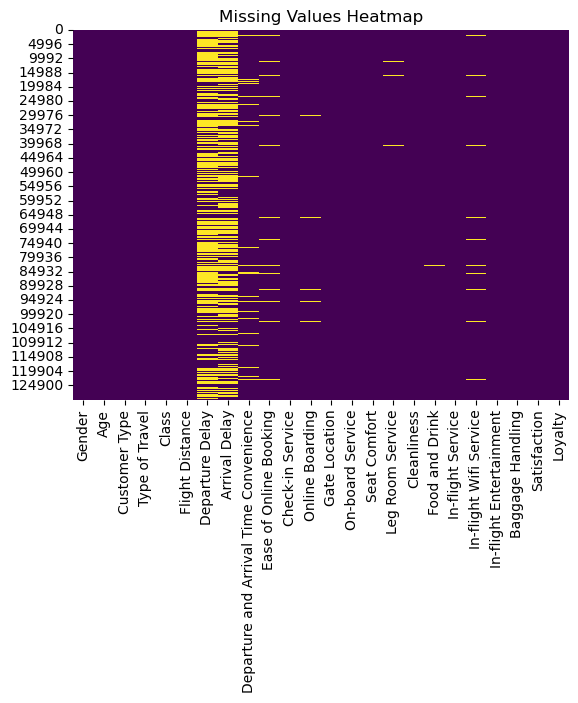

In [438]:
# Replace '0' values with NaN in satisfaction-related columns, as 0 indicates a null/missing survey response.
survey_columns = [
    'Departure Delay', 'Arrival Delay', 'Departure and Arrival Time Convenience', 
    'Ease of Online Booking', 'Check-in Service', 'Online Boarding', 'Gate Location', 
    'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness', 
    'Food and Drink', 'In-flight Service', 'In-flight Wifi Service', 
    'In-flight Entertainment', 'Baggage Handling'
]
data[survey_columns] = data[survey_columns].replace(0, np.nan)

# Visualize missing values
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [440]:
# Check percentage of missing values
missing_percentage = data.isnull().mean() * 100
print("Percentage of missing values:\n", missing_percentage)

# Impute missing values based on context: 
# - Median for numeric columns
# - Mode for categorical columns
data = data.dropna(subset=survey_columns)

# Impute missing values: Median for numeric columns, mode for categorical columns
for column in ['Departure Delay', 'Arrival Delay']:
    if data[column].isnull().sum() > 0:
        data[column] = data[column].fillna(data[column].median())

print("Null values are corrected \n")

Percentage of missing values:
 Gender                                     0.000000
Age                                        0.000000
Customer Type                              0.000000
Type of Travel                             0.000000
Class                                      0.000000
Flight Distance                            0.000000
Departure Delay                           56.479828
Arrival Delay                             56.318140
Departure and Arrival Time Convenience     5.143979
Ease of Online Booking                     4.374808
Check-in Service                           0.000770
Online Boarding                            2.371420
Gate Location                              0.000770
On-board Service                           0.003850
Seat Comfort                               0.000770
Leg Room Service                           0.460425
Cleanliness                                0.010779
Food and Drink                             0.101632
In-flight Service                

In [442]:
# Check the percentage of missing values after correction
missing_percentage = data.isnull().mean() * 100
print("Percentage of missing values:\n", missing_percentage)

data['Loyalty'].value_counts()

Percentage of missing values:
 Gender                                    0.0
Age                                       0.0
Customer Type                             0.0
Type of Travel                            0.0
Class                                     0.0
Flight Distance                           0.0
Departure Delay                           0.0
Arrival Delay                             0.0
Departure and Arrival Time Convenience    0.0
Ease of Online Booking                    0.0
Check-in Service                          0.0
Online Boarding                           0.0
Gate Location                             0.0
On-board Service                          0.0
Seat Comfort                              0.0
Leg Room Service                          0.0
Cleanliness                               0.0
Food and Drink                            0.0
In-flight Service                         0.0
In-flight Wifi Service                    0.0
In-flight Entertainment                   0.0
Bag

Loyalty
3    19513
4    13724
1     5698
2      974
Name: count, dtype: int64

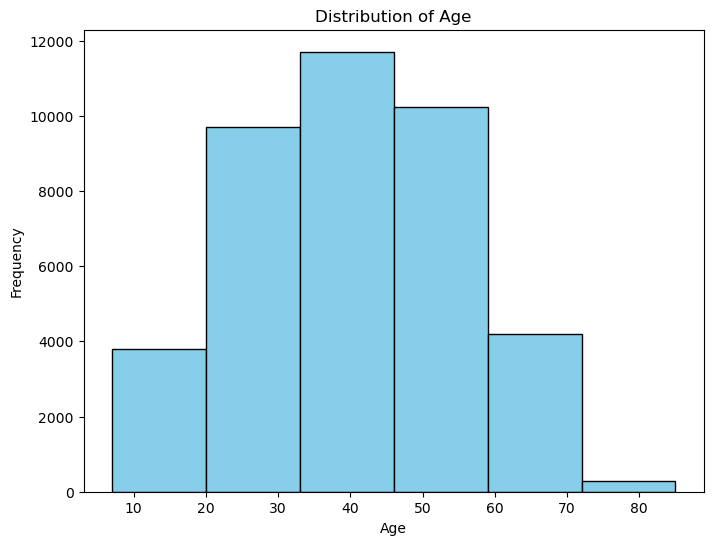

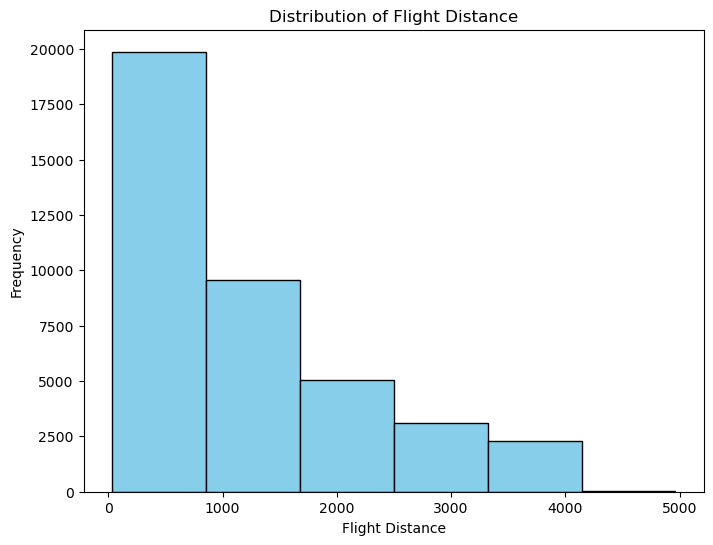

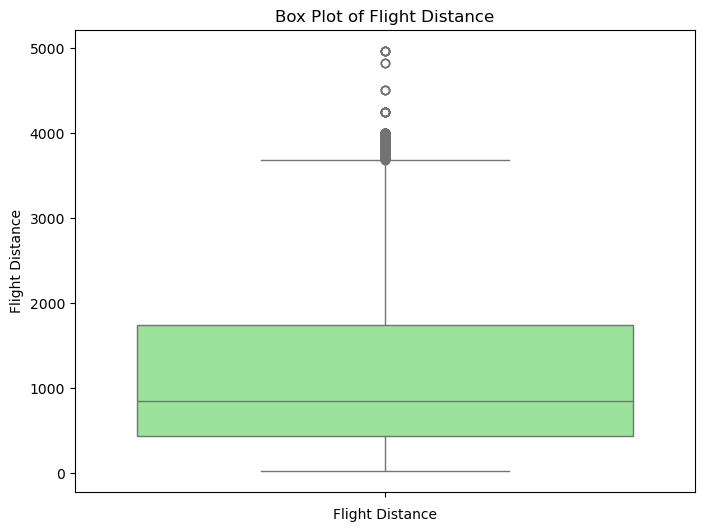

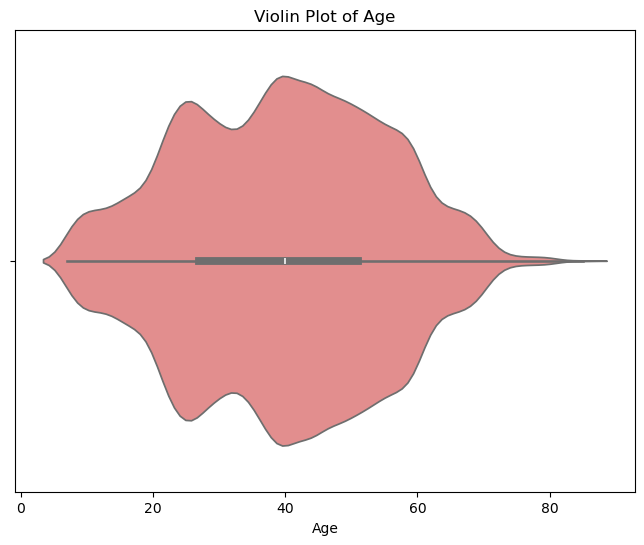

In [444]:

# Visualizing the distribution of a continuous feature, e.g., 'Age'
plt.figure(figsize=(8, 6))
plt.hist(data['Age'], bins=6, color='skyblue', edgecolor='black')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Visualizing the distribution of a continuous feature, e.g., 'Age'
plt.figure(figsize=(8, 6))
plt.hist(data['Flight Distance'], bins=6, color='skyblue', edgecolor='black')
plt.title('Distribution of Flight Distance')
plt.xlabel('Flight Distance')
plt.ylabel('Frequency')
plt.show()

# Box plot of a feature 'Flight Distance'  Box plots can reveal outliers and distribution spread. They are helpful for understanding how data values are dispersed across quartiles.
plt.figure(figsize=(8, 6))
sns.boxplot(data['Flight Distance'], color='lightgreen')
plt.title('Box Plot of Flight Distance')
plt.xlabel('Flight Distance')
plt.show()


# Violin plot for Age Violin plots combine a box plot with a kernel density plot, which is helpful for observing the distribution, especially if it’s multimodal (has multiple peaks).
plt.figure(figsize=(8, 6))
sns.violinplot(x=data['Age'], color='lightcoral')
plt.title('Violin Plot of Age')
plt.xlabel('Age')
plt.show()





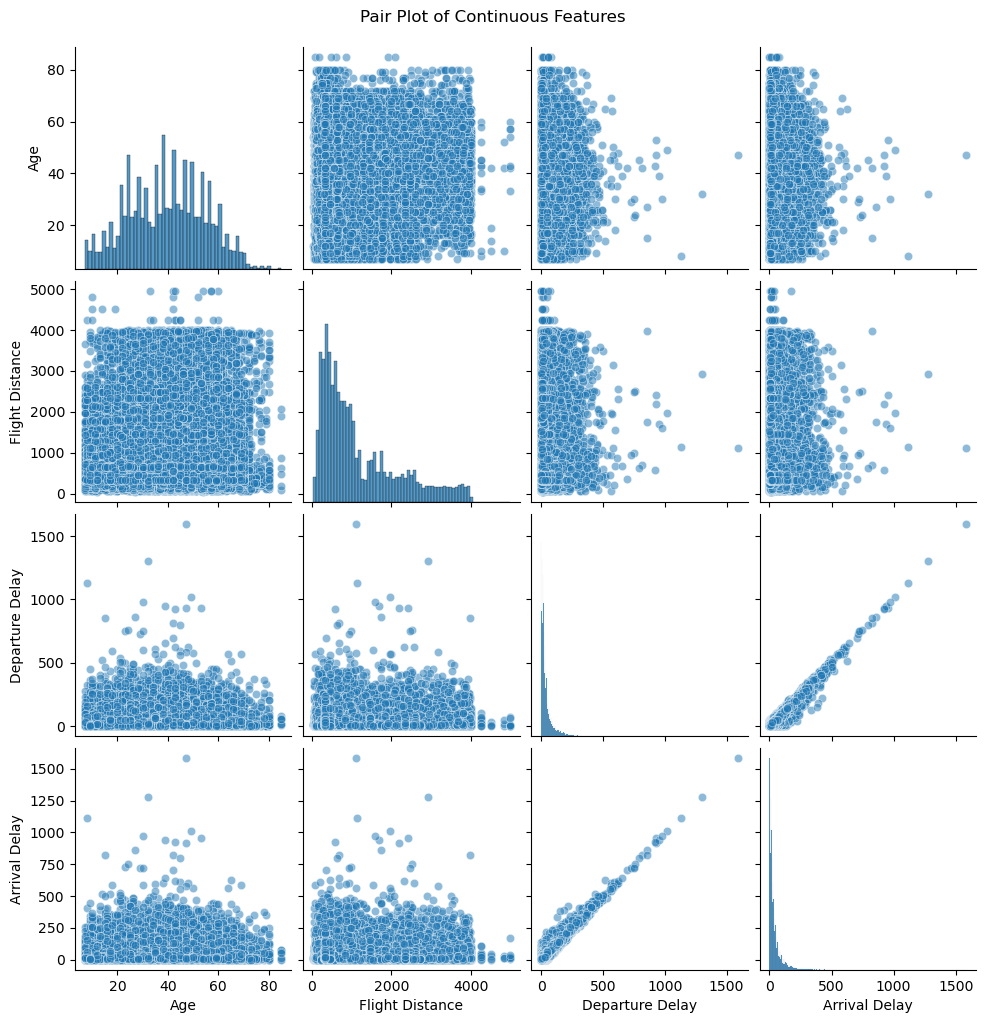

In [446]:
# Pair Plot  If you want to examine multiple features before splitting, a pair plot is a good choice as it shows pairwise relationships and distribution for each feature.


# Subset of continuous variables for pair plot
continuous_features = ['Age', 'Flight Distance', 'Departure Delay', 'Arrival Delay']

sns.pairplot(data[continuous_features], diag_kind='hist', plot_kws={'alpha': 0.5})
plt.suptitle('Pair Plot of Continuous Features', y=1.02)
plt.show()

In [448]:
#Encoding data 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


# One-hot encoding - Not going with this as its not helping in correlation and ANN
#data_encoded_1 = pd.get_dummies(data, columns=['Gender', 'Customer Type', 'Type of Travel', 'Class', 'Satisfaction'])
# Encoding for all the category columns to ensure that all numbers taken up for maching learning

data.loc[:, categorical_columns] = data[categorical_columns].apply(le.fit_transform)
#categorical_columns = ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'Satisfaction']


data.head()

,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,...,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction,Loyalty
0,1,48,0,0,0,821,2.0,5.0,3.0,3.0,...,5.0,2.0,5.0,5.0,5.0,3.0,5.0,5,0,1
1,0,35,1,0,0,821,26.0,39.0,2.0,2.0,...,4.0,5.0,5.0,3.0,5.0,2.0,5.0,5,1,4
11,0,27,0,0,0,421,20.0,21.0,2.0,2.0,...,2.0,5.0,1.0,1.0,3.0,1.0,1.0,4,0,1
12,1,24,0,0,1,453,16.0,30.0,2.0,2.0,...,5.0,4.0,5.0,5.0,4.0,2.0,5.0,4,0,1
13,1,9,1,1,0,853,68.0,76.0,5.0,1.0,...,5.0,3.0,5.0,5.0,5.0,1.0,5.0,4,0,3


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Cluster Centers (Bin Centers): [13.52613607 25.6840251  37.44992589 47.33052584 56.96377039 67.44379925]


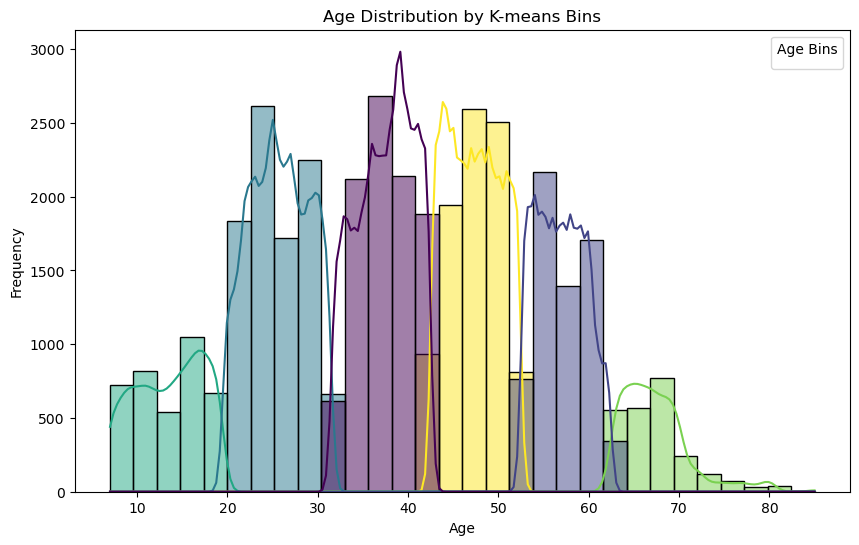

In [450]:
#Binning logic applied to bin attributes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans


# Kmean of age
ages = data['Age'].values.reshape(-1, 1)  # Reshaping for KMeans, which expects a 2D array
# Applying KMeans with  clusters
kmeans = KMeans(n_clusters=6, random_state=0)
data['Age_bins'] = kmeans.fit_predict(ages)

# Get the cluster centers (these represent the bin centroids)
centroids = np.sort(kmeans.cluster_centers_.flatten())
print("Cluster Centers (Bin Centers):", centroids)

plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Age', hue='Age_bins', palette='viridis', bins=30, kde=True)
plt.title('Age Distribution by K-means Bins')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend(title='Age Bins')
plt.show()

flightDist = data['Flight Distance'].values.reshape(-1, 1)  # Reshaping for KMeans, which expects a 2D array
# Applying KMeans with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=0)
data['Flight Distance'] = kmeans.fit_predict(flightDist)

departDelay = data['Departure Delay'].values.reshape(-1, 1)  # Reshaping for KMeans, which expects a 2D array
# Applying KMeans with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=0)
data['Departure Delay'] = kmeans.fit_predict(departDelay)

arrivDelay = data['Arrival Delay'].values.reshape(-1, 1)  # Reshaping for KMeans, which expects a 2D array
# Applying KMeans with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=0)
data['Arrival Delay '] = kmeans.fit_predict(arrivDelay)



Data types of each column:
 Gender                                     object
Age                                         int64
Customer Type                              object
Type of Travel                             object
Class                                      object
Flight Distance                             int32
Departure Delay                             int32
Arrival Delay                             float64
Departure and Arrival Time Convenience    float64
Ease of Online Booking                    float64
Check-in Service                          float64
Online Boarding                           float64
Gate Location                             float64
On-board Service                          float64
Seat Comfort                              float64
Leg Room Service                          float64
Cleanliness                               float64
Food and Drink                            float64
In-flight Service                         float64
In-flight Wifi Service

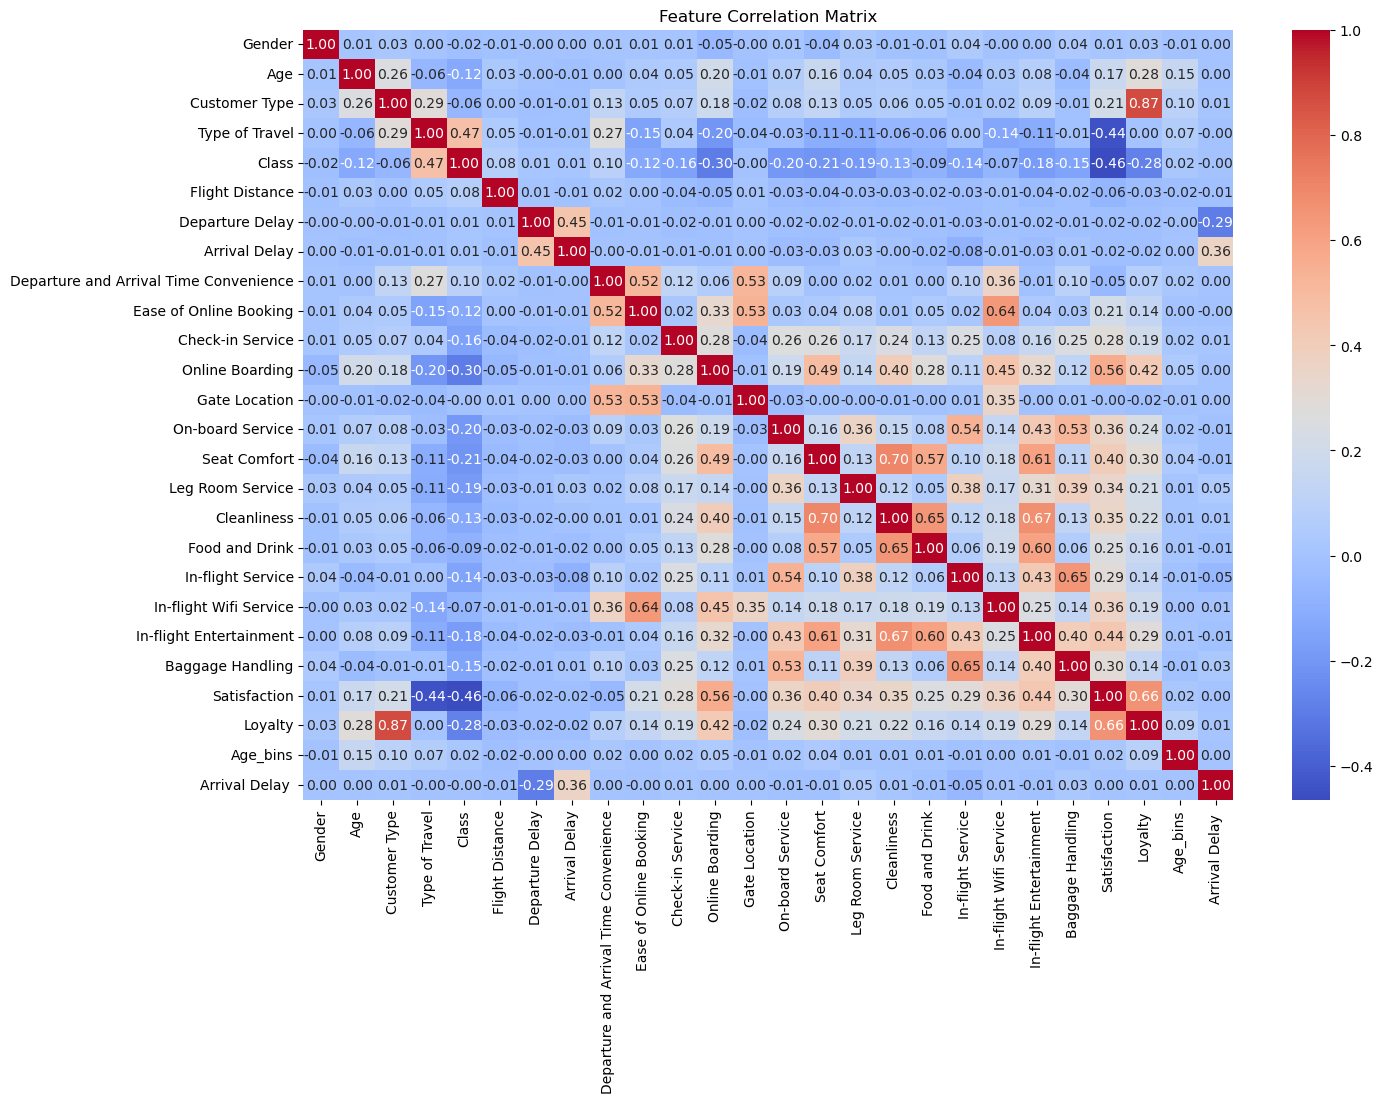

In [452]:
print("Data types of each column:\n", data.dtypes)

# 2. Select only numeric columns
numeric_data = data

# 3. Calculate and plot the correlation matrix
plt.figure(figsize=(15, 10))
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Matrix')
plt.show()

In [454]:
from sklearn.preprocessing import StandardScaler

# Scale numerical columns
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

# Verify scaling
data.describe()

,Age,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,...,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Loyalty,Age_bins,Arrival Delay
count,3.990900e+04,39909.000000,39909.000000,3.990900e+04,3.990900e+04,3.990900e+04,3.990900e+04,3.990900e+04,3.990900e+04,3.990900e+04,...,3.990900e+04,3.990900e+04,3.990900e+04,3.990900e+04,3.990900e+04,3.990900e+04,3.990900e+04,3.990900e+04,39909.000000,39909.000000
mean,-4.700275e-17,1.781403,0.750958,-1.994056e-17,-1.039758e-16,-1.196434e-16,-3.418382e-17,-1.751921e-16,1.513346e-17,-1.196434e-16,...,8.545955e-17,2.136489e-18,1.139461e-17,-3.133517e-17,1.281893e-16,-1.210677e-16,-5.697303e-18,-8.830820e-17,2.243529,0.920519
std,1.000013e+00,1.261858,1.244068,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,...,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.834583,0.726161
min,-2.159035e+00,0.000000,0.000000,-7.226613e-01,-1.578400e+00,-1.429489e+00,-1.759776e+00,-1.766524e+00,-1.566996e+00,-1.786528e+00,...,-1.815314e+00,-1.705018e+00,-1.633646e+00,-2.209490e+00,-1.422202e+00,-1.728108e+00,-2.240447e+00,-2.099807e+00,0.000000,0.000000
25%,-8.342613e-01,0.000000,0.000000,-5.658696e-01,-8.567305e-01,-6.533583e-01,-9.761414e-01,-9.787420e-01,-7.822987e-01,-1.013183e+00,...,-1.042402e+00,-9.445708e-01,-8.792413e-01,-4.949215e-01,-6.042713e-01,-9.783274e-01,-5.124399e-01,-3.502610e-02,1.000000,1.000000
50%,2.684136e-02,2.000000,0.000000,-3.219713e-01,-1.350610e-01,1.227721e-01,-1.925068e-01,-1.909596e-01,2.398785e-03,-2.398379e-01,...,5.034221e-01,-1.841238e-01,-1.248363e-01,3.623625e-01,2.136592e-01,5.212336e-01,3.515636e-01,-3.502610e-02,2.000000,1.000000
75%,7.554667e-01,3.000000,1.000000,1.658252e-01,5.866085e-01,8.989025e-01,5.911278e-01,5.968228e-01,7.870963e-01,5.335070e-01,...,5.034221e-01,5.763231e-01,6.295688e-01,3.623625e-01,1.031590e+00,5.212336e-01,3.515636e-01,9.973643e-01,4.000000,1.000000
max,3.007581e+00,3.000000,3.000000,2.685526e+01,1.308278e+00,1.675033e+00,1.374762e+00,1.384605e+00,1.571794e+00,1.306852e+00,...,1.276334e+00,1.336770e+00,1.383974e+00,1.219646e+00,1.849520e+00,1.271014e+00,1.215567e+00,9.973643e-01,5.000000,3.000000


In [456]:
data.head()

,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,...,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction,Loyalty,Age_bins,Arrival Delay
0,1,0.556751,0,0,0,0,0,-0.652976,-0.135061,0.122772,...,1.336770,1.383974,1.219646,0.213659,1.271014,1.215567,0,-2.099807,5,1
1,0,-0.304352,1,0,0,0,0,-0.060652,-0.856731,-0.653358,...,1.336770,-0.124836,1.219646,-0.604271,1.271014,1.215567,1,0.997364,0,1
11,0,-0.834261,0,0,0,3,0,-0.374235,-0.856731,-0.653358,...,-1.705018,-1.633646,-0.494922,-1.422202,-1.728108,0.351564,0,-2.099807,2,1
12,1,-1.032977,0,0,1,3,0,-0.217443,-0.856731,-0.653358,...,1.336770,1.383974,0.362362,-0.604271,1.271014,0.351564,0,-2.099807,2,1
13,1,-2.026557,1,1,0,0,3,0.583937,1.308278,-1.429489,...,1.336770,1.383974,1.219646,-1.422202,1.271014,0.351564,0,-0.035026,3,0


In [376]:
data['Comfort'] = (data['Flight Distance'] + data['Seat Comfort'] + data['Leg Room Service'] + data['Cleanliness'] + data['In-flight Entertainment']) / 3
data['Onboarding Convenience'] = (data['Ease of Online Booking'] + data['Check-in Service'] + data['Online Boarding'] + data['On-board Service']) / 3
data['Total Delay'] = data['Departure Delay'] + data['Arrival Delay']
data['Total Comfort'] = (data['Flight Distance'] + data['Seat Comfort'] + data['Leg Room Service'] + data['Cleanliness'] + data['In-flight Entertainment']) 
data['Total Onboarding Convenience'] = (data['Ease of Online Booking'] + data['Check-in Service'] + data['Online Boarding'] + data['On-board Service']) 


survey_columns = [
    'Departure Delay', 'Arrival Delay', 'Departure and Arrival Time Convenience', 
    'Ease of Online Booking', 'Check-in Service', 'Online Boarding', 
    'Gate Location', 'On-board Service', 'Seat Comfort', 
    'Leg Room Service', 'Cleanliness', 'Food and Drink', 
    'In-flight Service', 'In-flight Wifi Service', 
    'In-flight Entertainment', 'Baggage Handling'
]
data['Total Survey Score'] = data[survey_columns].sum(axis=1)



In [416]:


# Recalculate the correlation matrix
corr_matrix = data.corr()

# Get the correlation of all features with 'Loyalty'
loyalty_correlations = corr_matrix["Loyalty"]

# Convert all correlations to absolute values (making negative correlations positive)
loyalty_correlations = loyalty_correlations.abs()

# Sort the correlations in descending order
sorted_loyalty_correlations = loyalty_correlations.sort_values(ascending=False)

# Print the sorted positive correlations
print(sorted_loyalty_correlations)


Loyalty                                   1.000000
Customer Type                             0.873273
Satisfaction                              0.657057
Online Boarding                           0.422225
Onboarding Convenience                    0.399432
Total Onboarding Convenience              0.399432
Total Comfort                             0.388240
Comfort                                   0.388240
Flight Distance                           0.308493
Seat Comfort                              0.301079
In-flight Entertainment                   0.285550
Age                                       0.281368
Class                                     0.278900
On-board Service                          0.237225
Cleanliness                               0.222628
Leg Room Service                          0.207337
Check-in Service                          0.195000
In-flight Wifi Service                    0.193194
Food and Drink                            0.164514
Ease of Online Booking         

In [396]:
data.head()

df = pd.DataFrame(data)

# List of columns to convert to integers
columns_to_convert = ['Gender','Type of Travel','Class','Satisfaction']

# Convert specified columns to integers
for column in columns_to_convert:
    data[column] = df[column].astype(int)

# Check the updated DataFrame
print(data.dtypes)

Gender                                      int64
Age                                         int64
Customer Type                              object
Type of Travel                              int64
Class                                       int64
Flight Distance                             int32
Departure Delay                             int32
Arrival Delay                             float64
Departure and Arrival Time Convenience    float64
Ease of Online Booking                    float64
Check-in Service                          float64
Online Boarding                           float64
Gate Location                             float64
On-board Service                          float64
Seat Comfort                              float64
Leg Room Service                          float64
Cleanliness                               float64
Food and Drink                            float64
In-flight Service                         float64
In-flight Wifi Service                    float64


In [420]:
import pandas as pd
import numpy as np
from itertools import combinations

# Drop target and non-numeric features
X = data.drop(columns=['Satisfaction','Loyalty','Customer Type'])

# Identify numeric features
numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()

# List to hold interaction features
interaction_features_list = []

# Create interaction terms
for feature1, feature2 in combinations(numeric_features, 2):
    interaction_feature = X[feature1] * X[feature2]
    interaction_feature_name = f'{feature1}_x_{feature2}'
    interaction_features_list.append(interaction_feature.rename(interaction_feature_name))

# Combine original features with interaction features
interaction_features = pd.concat(interaction_features_list, axis=1)
X_with_interactions = pd.concat([X, interaction_features], axis=1)

# Display the DataFrame with interaction features
print("DataFrame with Interaction Features:")
print(X_with_interactions)

# Evaluate correlations with target variable
correlation_matrix = X_with_interactions.corr()
print("\nCorrelation with Satisfaction:")
print(correlation_matrix['Satisfaction'].sort_values(ascending=False))

DataFrame with Interaction Features:
   Age  Flight Distance  Departure Delay  Arrival Delay  \
0   25              500               10              5   
1   30              800                5              0   
2   35              200                0             10   
3   40             1500               20             15   

   Age_x_Flight Distance  Age_x_Departure Delay  Age_x_Arrival Delay  \
0                  12500                    250                  125   
1                  24000                    150                    0   
2                   7000                      0                  350   
3                  60000                    800                  600   

   Flight Distance_x_Departure Delay  Flight Distance_x_Arrival Delay  \
0                               5000                             2500   
1                               4000                                0   
2                                  0                             2000   
3             

KeyError: 'Satisfaction'

In [414]:
import pandas as pd
import statsmodels.api as sm

# Assuming `data` is your DataFrame with features and 'Loyalty' as the target variable
X = data.drop(columns=['Loyalty' ]) # Features
y = data['Loyalty']  # Target

# Assuming X and y are already defined
# Check the data types
print(X.dtypes)
print(y.dtypes)

# Convert to numeric if necessary
X = X.apply(pd.to_numeric, errors='coerce')
y = pd.to_numeric(y, errors='coerce')

# Handle missing values
X = X.dropna()
y = y[X.index]  # Align y with the cleaned X

def backward_elimination(X, y, significance_level=0.05):
    X_with_constant = sm.add_constant(X)
    model = sm.OLS(y, X_with_constant).fit()
    while True:
        p_values = model.pvalues[1:]  # Exclude constant
        max_p_value = p_values.max()
        if max_p_value > significance_level:
            feature_to_remove = p_values.idxmax()
            X = X.drop(columns=[feature_to_remove])
            model = sm.OLS(y, sm.add_constant(X)).fit()
        else:
            break
    return X.columns.tolist()

selected_features_backward = backward_elimination(X, y)
print("Selected features using Backward Elimination:", selected_features_backward)

Gender                                      int64
Age                                         int64
Customer Type                              object
Type of Travel                              int64
Class                                       int64
Flight Distance                             int32
Departure Delay                             int32
Arrival Delay                             float64
Departure and Arrival Time Convenience    float64
Ease of Online Booking                    float64
Check-in Service                          float64
Online Boarding                           float64
Gate Location                             float64
On-board Service                          float64
Seat Comfort                              float64
Leg Room Service                          float64
Cleanliness                               float64
Food and Drink                            float64
In-flight Service                         float64
In-flight Wifi Service                    float64
